In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv
/kaggle/input/plant-pathology-2020-fgvc7/train.csv
/kaggle/input/plant-pathology-2020-fgvc7/test.csv
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1743.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_262.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1524.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1336.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1461.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1797.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1499.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1170.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1259.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_422.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_636.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1395.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1800.jpg
/kaggle/input/plant-patholog

In [5]:
train_df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/train.csv')
test_df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/test.csv')

In [3]:
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [13]:
train_df['sum'] = train_df.sum(axis=1, numeric_only=True)
train_df[(train_df['sum'] > 1) | (train_df['sum'] == 0)]

,image_id,healthy,multiple_diseases,rust,scab,sum


In [6]:
IMAGE_DIR = '/kaggle/input/plant-pathology-2020-fgvc7/images'

In [7]:
train_df['path'] = IMAGE_DIR + '/' + train_df['image_id'] + '.jpg'
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab,path
0,Train_0,0,0,0,1,/kaggle/input/plant-pathology-2020-fgvc7/image...
1,Train_1,0,1,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
2,Train_2,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
3,Train_3,0,0,1,0,/kaggle/input/plant-pathology-2020-fgvc7/image...
4,Train_4,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/image...


In [8]:
def get_label(x):
    if x['healthy'] == 1:
        return 'healthy'
    elif x['multiple_diseases'] == 1:
        return 'multiple_diseases'
    if x['multiple_diseases'] == 1:
        return 'multiple_diseases'
    if x['rust'] == 1:
        return 'rust'
    if x['scab'] == 1:
        return 'scab'
    else: 
        return 'None'

In [9]:
train_df['label'] = train_df.apply(get_label, axis=1)

In [10]:
pd.set_option("max_colwidth", 100)
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab,path,label
0,Train_0,0,0,0,1,/kaggle/input/plant-pathology-2020-fgvc7/images/Train_0.jpg,scab
1,Train_1,0,1,0,0,/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1.jpg,multiple_diseases
2,Train_2,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/images/Train_2.jpg,healthy
3,Train_3,0,0,1,0,/kaggle/input/plant-pathology-2020-fgvc7/images/Train_3.jpg,rust
4,Train_4,1,0,0,0,/kaggle/input/plant-pathology-2020-fgvc7/images/Train_4.jpg,healthy


In [11]:
print(f'shape: {train_df.shape}')
train_df['label'].value_counts()

shape: (1821, 7)


rust                 622
scab                 592
healthy              516
multiple_diseases     91
Name: label, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

def show_grid_images(image_path_list, augmentor=None, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)

    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)   
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].set_title(title)

In [15]:
rust_image_list = train_df[train_df['label'] == 'rust']['path'].iloc[:6].tolist()
scab_image_list = train_df[train_df['label'] == 'scab']['path'].iloc[:6].tolist()
healthy_image_list = train_df[train_df['label'] == 'healthy']['path'].iloc[:6].tolist()
multiple_image_list = train_df[train_df['label'] == 'multiple_diseases']['path'].iloc[:6].tolist()

['/kaggle/input/plant-pathology-2020-fgvc7/images/Train_3.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_10.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_14.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_15.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_21.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_23.jpg'] rust
['/kaggle/input/plant-pathology-2020-fgvc7/images/Train_0.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_7.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_8.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_11.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_12.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_16.jpg'] scab
['/kaggle/input/plant-pathology-2020-fgvc7/images/Train_2.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_4.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_5.jpg', '/kaggle/input/plant-pathology-202

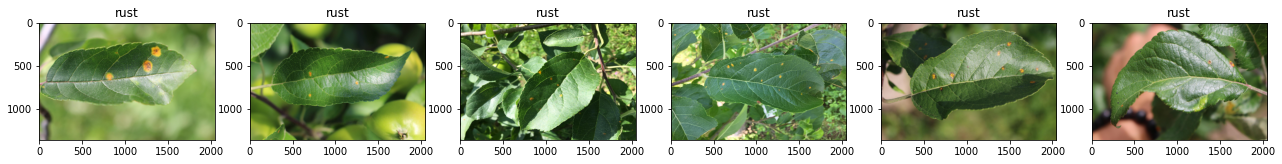

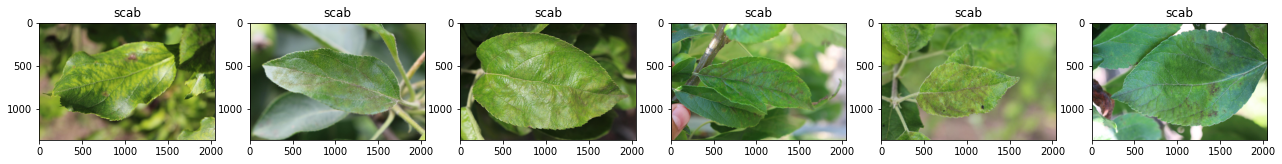

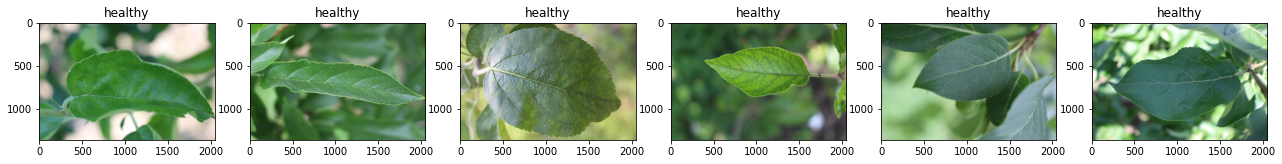

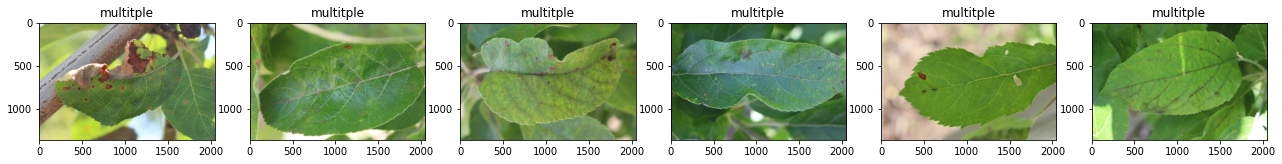

In [16]:
for l, t in zip([rust_image_list, scab_image_list, healthy_image_list, multiple_image_list], ['rust', 'scab', 'healthy', 'multitple']):
    print(l, t)
    show_grid_images(l, ncols=6, title=t)

['/kaggle/input/plant-pathology-2020-fgvc7/images/Train_3.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_10.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_14.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_15.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_21.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_23.jpg'] rust
['/kaggle/input/plant-pathology-2020-fgvc7/images/Train_3.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_10.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_14.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_15.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_21.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_23.jpg'] aug_rust
['/kaggle/input/plant-pathology-2020-fgvc7/images/Train_0.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_7.jpg', '/kaggle/input/plant-pathology-2020-fgvc7/images/Train_8.jpg', '/kaggle/input/plant-patholo

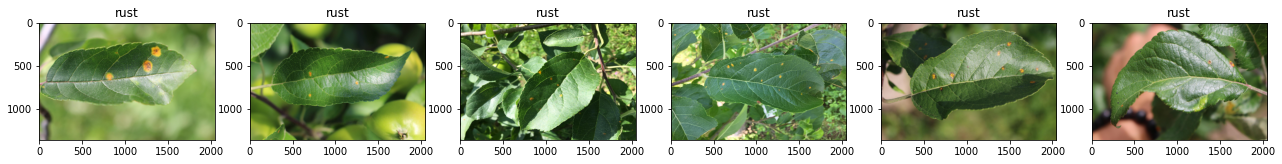

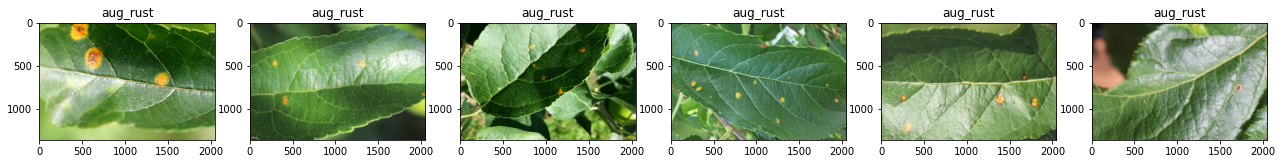

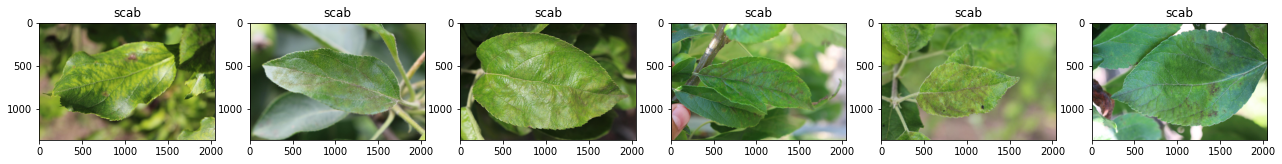

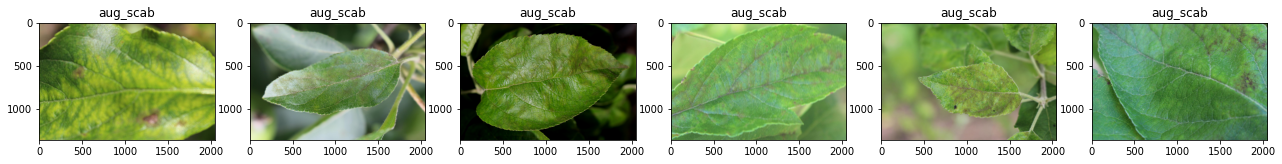

In [17]:
import albumentations as A

augmentor_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.5, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.Blur(p=0.2)
])

for l, t, a in zip([rust_image_list, rust_image_list, scab_image_list, scab_image_list], ['rust', 'aug_rust', 'scab', 'aug_scab'], [None, augmentor_01, None, augmentor_01]):
    print(l, t)
    show_grid_images(l, a, ncols=6, title=t)

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

# 입력 인자 image_filenames, labels는 모두 numpy array로 들어옴. image size는 (높이, 너비)로 수정. 
class Plant_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=(224, 224), batch_size=64, 
                 augmentor=None, shuffle=False, pre_func=None):
        '''
        파라미터 설명
        image_filenames: opencv로 image를 로드할 파일의 절대 경로들
        labels: 해당 image의 label들
        batch_size: __getitem__(self, index) 호출 시 마다 가져올 데이터 batch 건수
        augmentor: albumentations 객체
        shuffle: 학습 데이터의 경우 epoch 종료시마다 데이터를 섞을지 여부
        '''
        # 객체 생성 인자로 들어온 값을 객체 내부 변수로 할당. 
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data의 경우 
        self.shuffle = shuffle
        if self.shuffle:
            # 객체 생성시에 한번 데이터를 섞음. 
            #self.on_epoch_end()
            pass
    
    # Sequence를 상속받은 Dataset은 batch_size 단위로 입력된 데이터를 처리함. 
    # __len__()은 전체 데이터 건수가 주어졌을 때 batch_size단위로 몇번 데이터를 반환하는지 나타남
    def __len__(self):
        # batch_size단위로 데이터를 몇번 가져와야하는지 계산하기 위해 전체 데이터 건수를 batch_size로 나누되, 정수로 정확히 나눠지지 않을 경우 1회를 더한다. 
        return int(np.ceil(len(self.image_filenames) / self.batch_size))
    
    # batch_size 단위로 image_array, label_array 데이터를 가져와서 변환한 뒤 다시 반환함
    # 인자로 몇번째 batch 인지를 나타내는 index를 입력하면 해당 순서에 해당하는 batch_size 만큼의 데이타를 가공하여 반환
    # batch_size 갯수만큼 변환된 image_array와 label_array 반환. 
    def __getitem__(self, index):
        # index는 몇번째 batch인지를 나타냄. 
        # batch_size만큼 순차적으로 데이터를 가져오려면 array에서 index*self.batch_size:(index+1)*self.batch_size 만큼의 연속 데이터를 가져오면 됨
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        
        # label_batch가 None이 될 수 있음. 
        else: 
            label_batch = None
        # 만일 객체 생성 인자로 albumentation으로 만든 augmentor가 주어진다면 아래와 같이 augmentor를 이용하여 image 변환
        # albumentations은 개별 image만 변환할 수 있으므로 batch_size만큼 할당된 image_name_batch를 한 건씩 iteration하면서 변환 수행. 
        # image_batch 배열은 float32 로 설정. 
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size[0], self.image_size[1], 3), dtype='float32')
        
        # batch_size에 담긴 건수만큼 iteration 하면서 opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음. 
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            #원본 이미지와 다르게 resize 적용. opencv의 resize은 (가로, 세로)의 개념임. 배열은 (높이, 너비)의 개념이므로 이에 주의하여 opencv resize 인자 입력 필요.  
            image = cv2.resize(image, (self.image_size[1], self.image_size[0]))
            # 만일 preprocessing_input이 pre_func인자로 들어오면 이를 이용하여 scaling 적용. 
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
        
        return image_batch, label_batch
    
    # epoch가 한번 수행이 완료 될 때마다 모델의 fit()에서 호출됨. 
    def on_epoch_end(self):
        if(self.shuffle):
            #print('epoch end')
            # 전체 image 파일의 위치와 label를 쌍을 맞춰서 섞어준다. scikt learn의 utils.shuffle에서 해당 기능 제공
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass

In [51]:
sample_df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv')
sample_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


In [19]:
def get_train_valid(train_df, valid_size=0.2, random_state=2021):
    train_path = train_df['path'].values
    train_label = train_df[['healthy', 'multiple_diseases', 'rust', 'scab']].values
    
    tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, test_size=valid_size, random_state=random_state)
    print('tr_path shape:', tr_path.shape, 'tr_label shape:', tr_label.shape, 'val_path shape:', val_path.shape, 'val_label shape:', val_label.shape)
    
    return tr_path, val_path, tr_label, val_label

In [20]:
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64

tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)

tr_ds = Plant_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=augmentor_01, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Plant_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                      augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

tr_image_batch, tr_label_batch = next(iter(tr_ds))
val_image_batch, val_label_batch = next(iter(val_ds))
print(tr_image_batch.shape, val_image_batch.shape, tr_label_batch.shape, val_label_batch.shape)
print(tr_image_batch[0], val_image_batch[0])

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(64, 224, 224, 3) (64, 224, 224, 3) (64, 4) (64, 4)
[[[-0.2862745   0.11372554 -0.3960784 ]
  [-0.2862745   0.09019613 -0.41960782]
  [-0.34117645  0.06666672 -0.45098037]
  ...
  [-0.46666664 -0.12156862 -0.3960784 ]
  [-0.4352941  -0.11372548 -0.38039213]
  [-0.45098037 -0.12941176 -0.3960784 ]]

 [[-0.31764704  0.082353   -0.41960782]
  [-0.30196077  0.082353   -0.4352941 ]
  [-0.3098039   0.09019613 -0.42745095]
  ...
  [-0.4823529  -0.1372549  -0.41176468]
  [-0.46666664 -0.14509803 -0.41176468]
  [-0.46666664 -0.14509803 -0.41176468]]

 [[-0.32549018  0.09803927 -0.41176468]
  [-0.32549018  0.07450986 -0.45098037]
  [-0.36470586  0.04313731 -0.46666664]
  ...
  [-0.46666664 -0.12156862 -0.3960784 ]
  [-0.4588235  -0.1372549  -0.40392154]
  [-0.4588235  -0.1372549  -0.40392154]]

 ...

 [[-0.4588235  -0.1372549  -0.5764706 ]
  [-0.46666664 -0.14509803 -0.58431375]
  [-0.47450978 -0.14

In [21]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.metrics import AUC

from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
import tensorflow as tf


def create_model(model_type='efficientnetb0', in_shape=(224, 224, 3), n_classes=4):
    input_tensor = Input(shape=in_shape)

    if model_type == 'resnet50v2':
        base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'xception':
        base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb0':
        base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb1':
        base_model = tf.keras.applications.EfficientNetB1(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb2':
        base_model = tf.keras.applications.EfficientNetB2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb3':
        base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb4':
        base_model = tf.keras.applications.EfficientNetB4(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb5':
        base_model = tf.keras.applications.EfficientNetB5(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb6':
        base_model = tf.keras.applications.EfficientNetB6(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb7':
        base_model = tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
    x = base_model.output  
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)    
    preds = Dense(units=n_classes, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=preds)
    

    return model

In [68]:
from tensorflow.keras.metrics import AUC

xcp_model_01 = create_model(model_type='xception', in_shape=(224, 224, 3))
xcp_model_01.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=[AUC()])

# 3번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
# 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

history = xcp_model_01.fit(tr_ds, epochs=10, steps_per_epoch=int(np.ceil(tr_path.shape[0]/BATCH_SIZE)), 
               validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/BATCH_SIZE)),
               callbacks=([rlr_cb, ely_cb]), verbose=1)

2022-10-11 02:41:40.419248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 02:41:40.528021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 02:41:40.528838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 02:41:40.530699: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 0s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-10-11 02:41:48.023435: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-11 02:41:57.463464: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


23/23 [==============================] - 109s 4s/step - loss: 1.0274 - auc: 0.8285 - val_loss: 0.9604 - val_auc: 0.8763
Epoch 2/10
23/23 [==============================] - 84s 4s/step - loss: 0.4853 - auc: 0.9602 - val_loss: 0.6506 - val_auc: 0.9459
Epoch 3/10
23/23 [==============================] - 83s 4s/step - loss: 0.3155 - auc: 0.9821 - val_loss: 0.5161 - val_auc: 0.9625
Epoch 4/10
23/23 [==============================] - 85s 4s/step - loss: 0.2476 - auc: 0.9880 - val_loss: 0.5201 - val_auc: 0.9655
Epoch 5/10
23/23 [==============================] - 87s 4s/step - loss: 0.1912 - auc: 0.9920 - val_loss: 0.3586 - val_auc: 0.9735
Epoch 6/10
23/23 [==============================] - 84s 4s/step - loss: 0.1600 - auc: 0.9947 - val_loss: 0.3292 - val_auc: 0.9764
Epoch 7/10
23/23 [==============================] - 85s 4s/step - loss: 0.1374 - auc: 0.9955 - val_loss: 0.3393 - val_auc: 0.9788
Epoch 8/10
23/23 [==============================] - 83s 4s/step - loss: 0.1106 - auc: 0.9976 - val_l

In [69]:
test_df.head(10)

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
5,Test_5
6,Test_6
7,Test_7
8,Test_8
9,Test_9


In [22]:
IMAGE_DIR = '/kaggle/input/plant-pathology-2020-fgvc7/images'
test_df = pd.read_csv("../input/plant-pathology-2020-fgvc7/test.csv")
test_df['path'] = IMAGE_DIR + '/' + test_df['image_id'] + '.jpg'

test_df.head(10)

,image_id,path
0,Test_0,/kaggle/input/plant-pathology-2020-fgvc7/images/Test_0.jpg
1,Test_1,/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1.jpg
2,Test_2,/kaggle/input/plant-pathology-2020-fgvc7/images/Test_2.jpg
3,Test_3,/kaggle/input/plant-pathology-2020-fgvc7/images/Test_3.jpg
4,Test_4,/kaggle/input/plant-pathology-2020-fgvc7/images/Test_4.jpg
5,Test_5,/kaggle/input/plant-pathology-2020-fgvc7/images/Test_5.jpg
6,Test_6,/kaggle/input/plant-pathology-2020-fgvc7/images/Test_6.jpg
7,Test_7,/kaggle/input/plant-pathology-2020-fgvc7/images/Test_7.jpg
8,Test_8,/kaggle/input/plant-pathology-2020-fgvc7/images/Test_8.jpg
9,Test_9,/kaggle/input/plant-pathology-2020-fgvc7/images/Test_9.jpg


In [73]:
test_path = test_df['path'].values

test_ds = Plant_Dataset(image_filenames=test_path, labels=None, image_size=IMAGE_SIZE, \
                         batch_size=BATCH_SIZE, augmentor=None, shuffle=None, pre_func=xcp_preprocess_input)
preds = xcp_model_01.predict(test_ds)

In [75]:
preds_df = pd.DataFrame(preds)
preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
submit_df = pd.concat([test_df['image_id'], preds_df], axis=1)
submit_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.000312,0.000630,9.990089e-01,0.000048
1,Test_1,0.000004,0.000356,9.996383e-01,0.000001
2,Test_2,0.000001,0.000012,1.010756e-07,0.999987
3,Test_3,0.999544,0.000021,4.127060e-04,0.000022
4,Test_4,0.000011,0.000264,9.997199e-01,0.000005


In [76]:
submit_df.to_csv('submit_01.csv', index=False)

In [23]:
def make_submit_df(test_df, model):
    test_path = test_df['path'].values
    # labels는 None을 입력하고 Dataset 생성. 
    test_ds = Plant_Dataset(image_filenames=test_path, labels=None, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                            augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)
    #predict()로 예측 수행. 
    preds = model.predict(test_ds)
    
    # 예측한 결과를 기반으로 별도의 결과 DataFrame을 생성.
    preds_df = pd.DataFrame(preds)
    preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
    # 테스트용 DataFrame에 바로 위에서 생성한 결과 DataFrame을 합친 뒤 이를 이용하여 submit용 DataFrame 생성.  
    submit_df = pd.concat([test_df['image_id'], preds_df], axis=1)
    
    return submit_df

In [28]:
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

IMAGE_SIZE = (320, 512)
BATCH_SIZE = 64

tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)

tr_ds = Plant_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, \
                       augmentor=augmentor_01, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Plant_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, \
                       augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

tr_image_batch, tr_label_batch = next(iter(tr_ds))
val_image_batch, val_label_batch = next(iter(val_ds))
print(tr_image_batch.shape, val_image_batch.shape, tr_label_batch.shape, val_label_batch.shape)
print(tr_image_batch[0], val_image_batch[0])

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(64, 320, 512, 3) (64, 320, 512, 3) (64, 4) (64, 4)
[[[0.41176474 0.45882356 0.18431377]
  [0.39607847 0.4431373  0.1686275 ]
  [0.37254906 0.41960788 0.14509809]
  ...
  [0.4666667  0.48235297 0.24705887]
  [0.45882356 0.48235297 0.23921573]
  [0.45882356 0.48235297 0.23921573]]

 [[0.43529415 0.45882356 0.19215691]
  [0.4039216  0.4431373  0.17647064]
  [0.37254906 0.427451   0.14509809]
  ...
  [0.4901961  0.5058824  0.26274514]
  [0.4901961  0.5058824  0.26274514]
  [0.4901961  0.49803925 0.254902  ]]

 [[0.4431373  0.45882356 0.19215691]
  [0.41960788 0.45882356 0.18431377]
  [0.3803922  0.43529415 0.15294123]
  ...
  [0.5137255  0.52156866 0.27843142]
  [0.5137255  0.52156866 0.27843142]
  [0.5058824  0.52156866 0.27058828]]

 ...

 [[0.45098042 0.81960785 0.2941177 ]
  [0.45098042 0.8352941  0.30980396]
  [0.4431373  0.84313726 0.32549024]
  ...
  [0.28627455 0.7019608  0.23921573]


In [29]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
import tensorflow as tf

# learning rate scheduler에 적용할 함수 선언. 
def lrfn_01(epoch):
    LR_START = 1e-5
    LR_MAX = 1e-4
    LR_RAMPUP_EPOCHS = 2
    LR_SUSTAIN_EPOCHS = 1
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        return lr
    
    return calc_fn(epoch)

def lrfn_02(epoch):
    LR_START = 1e-6
    LR_MAX = 2e-5
    LR_RAMPUP_EPOCHS = 2
    LR_SUSTAIN_EPOCHS = 1
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        return lr
    
    return calc_fn(epoch)

In [34]:
lr01_cb = tf.keras.callbacks.LearningRateScheduler(lrfn_01, verbose=1)
lr02_cb = tf.keras.callbacks.LearningRateScheduler(lrfn_02, verbose=1)
rlr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
ely_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

In [31]:
augmentor_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.5, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.Blur(p=0.2)
])


In [35]:
class Config():
    MODEL_TYPE = 'xception'
    IMAGE_SIZE = (320, 512)
    BATCH_SIZE = 32
    N_EPOCHS = 10
    IS_FINE_TUNING = False
    FIRST_EPOCHS = 15
    SECOND_EPOCHS = 15
    FIRST_CALLBACKS = [lr01_cb, ely_cb]
    SECOND_CALLBACKS = [lr02_cb, ely_cb]
    AUGMENTOR = augmentor_01
    PRE_FUNC = xcp_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = True

In [36]:
def train_model(train_df, config=Config):
    # 학습과 검증 데이터 이미지/레이블로 분리하고 학습/검증 Dataset 생성. 
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)
    
    tr_ds = Plant_Dataset(tr_path, tr_label, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE, 
                          augmentor=config.AUGMENTOR, shuffle=True, pre_func=config.PRE_FUNC)
    val_ds = Plant_Dataset(val_path, val_label, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE, 
                          augmentor=None, shuffle=False, pre_func=config.PRE_FUNC)
    if config.DEBUG:
        tr_image_batch = next(iter(tr_ds))[0]
        val_image_batch = next(iter(val_ds))[0]
        print(tr_image_batch.shape, val_image_batch.shape)
        print(tr_image_batch[0], val_image_batch[0])
        
    # model_type인자로 들어온 모델 생성. optimizer Adam적용. 
    print('#######', config.MODEL_TYPE, ' 생성 및 학습 수행 ########')
    model = create_model(model_type=config.MODEL_TYPE, in_shape=(config.IMAGE_SIZE[0], config.IMAGE_SIZE[1], 3), n_classes=4)
    model.compile(optimizer=Adam(lr=config.INITIAL_LR), loss='categorical_crossentropy', metrics=[AUC()])
    
    # 만일 Fine tuning 일 경우 아래 로직 적용. 
    if config.IS_FINE_TUNING:
        print('####### Fine tuning 학습을 시작합니다. ########')
        # 첫번째 Fine Tuning. Feature Extractor를 제외한 classification layer를 학습.(Feature Extractor layer들을 trainable=False 설정)
        for layer in model.layers[:-4]:
            layer.trainable = False
        
        print('####### Classification Layer들의 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.FIRST_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                           validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                           callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
        # 두번째, 전체 Layer를 학습. 전체 layer를 trainable=True로 수정. 모델이 EfficientNet 계열일 경우 Batch Normalization layer는 학습 제외. 
        for layer in model.layers:
            if config.MODEL_TYPE in 'efficientnet':
                if not isinstance(layer, layers.BatchNormalization):
                    layer.trainable = True
            else:
                layer.trainable = True
        
        print('####### 전체 Layer들의 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.SECOND_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                           validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                           callbacks=(config.SECOND_CALLBACKS), verbose=1)
    
    # Fine Tuning이 아닐 경우 
    else:
        print('####### 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.N_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                       validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                       callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
    return model, history

In [ ]:
xcp_model_02, history = train_model(train_df, config=Config)

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(32, 320, 512, 3) (32, 320, 512, 3)
[[[0.5764706  0.62352943 0.36470592]
  [0.5686275  0.60784316 0.34901965]
  [0.54509807 0.58431375 0.32549024]
  ...
  [0.6313726  0.654902   0.41960788]
  [0.6156863  0.6392157  0.41960788]
  [0.6156863  0.6392157  0.41960788]]

 [[0.60784316 0.62352943 0.3803922 ]
  [0.5686275  0.60784316 0.34901965]
  [0.54509807 0.5921569  0.33333337]
  ...
  [0.6627451  0.67058825 0.4431373 ]
  [0.6627451  0.67058825 0.4431373 ]
  [0.64705884 0.654902   0.427451  ]]

 [[0.6        0.62352943 0.37254906]
  [0.5921569  0.6313726  0.37254906]
  [0.54509807 0.5921569  0.33333337]
  ...
  [0.6784314  0.6784314  0.45882356]
  [0.6784314  0.6862745  0.4666667 ]
  [0.67058825 0.6784314  0.45882356]]

 ...

 [[0.6156863  0.96862745 0.47450984]
  [0.6156863  0.9843137  0.48235297]
  [0.6        0.9843137  0.49803925]
  ...
  [0.4666667  0.85882354 0.427451  ]
  [0.47450984 0.

2022-10-11 04:45:47.779492: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 04:45:47.881004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 04:45:47.881890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 04:45:47.883929: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 0s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


####### 학습을 시작합니다. ########


2022-10-11 04:45:53.680243: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 1e-05.


2022-10-11 04:46:00.315028: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-10-11 04:46:06.218917: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-10-11 04:46:06.716573: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.42GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-10-11 04:46:06.728848: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory

46/46 [==============================] - 132s 3s/step - loss: 1.2929 - auc: 0.6585 - val_loss: 1.1897 - val_auc: 0.7420
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 5.5e-05.
46/46 [==============================] - 116s 3s/step - loss: 0.8304 - auc: 0.9024 - val_loss: 0.5909 - val_auc: 0.9401
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0001.
46/46 [==============================] - 109s 2s/step - loss: 0.3458 - auc: 0.9777 - val_loss: 0.4623 - val_auc: 0.9629
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0001.
46/46 [==============================] - 105s 2s/step - loss: 0.1869 - auc: 0.9921 - val_loss: 0.2372 - val_auc: 0.9874
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0001.
46/46 [==============================] - 104s 2s/step - loss: 0.1435 - auc: 0.9950 - val_loss: 0.2214 - val_auc: 0.9874
Epoch 6/10

Epoch 00006: LearningRateScheduler setting learning rate to 7.50000

In [ ]:
def make_submit_df(test_df, model, config=Config):
    test_path = test_df['path'].values
    test_ds = Plant_Dataset(image_filenames=test_path, labels=None, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE,
                           augmentor=None, shuffle=False, pre_func=config.PRE_FUNC)
    
    preds = model.predict(test_ds)
    
    preds_df = pd.DataFrame(preds)
    preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
    submit_df = pd.concat([test_df['image_id'], preds_df], axis=1)
    
    return submit_df

In [ ]:
submit_df = make_submit_df(test_df, xcp_model_02, config=Config)
submit_df.to_csv('submit_xcp_02.csv', index=False)

In [42]:
class Config:
    MODEL_TYPE = 'efficientnetb3'
    IMAGE_SIZE = (320, 512)
    BATCH_SIZE = 16
    N_EPOCHS = 10
    IS_FINE_TUNING = False
    FIRST_EPOCHS = 15
    SECOND_EPOCHS = 15
    FIRST_CALLBACKS = [lr01_cb, ely_cb]
    SECOND_CALLBACKS = [lr02_cb, ely_cb]
    AUGMENTOR = augmentor_01
    PRE_FUNC = eff_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = True

In [43]:
effb3_model, history = train_model(train_df, config=Config)

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(16, 320, 512, 3) (16, 320, 512, 3)
[[[186. 192. 156.]
  [184. 190. 154.]
  [181. 187. 151.]
  ...
  [193. 196. 164.]
  [192. 194. 164.]
  [192. 194. 164.]]

 [[190. 192. 158.]
  [185. 190. 154.]
  [181. 188. 152.]
  ...
  [197. 198. 167.]
  [197. 198. 167.]
  [195. 196. 165.]]

 [[189. 192. 157.]
  [188. 193. 157.]
  [181. 188. 152.]
  ...
  [199. 200. 169.]
  [200. 201. 170.]
  [198. 200. 168.]]

 ...

 [[191. 239. 171.]
  [190. 241. 173.]
  [190. 241. 175.]
  ...
  [170. 224. 165.]
  [172. 223. 162.]
  [170. 220. 157.]]

 [[191. 236. 169.]
  [191. 238. 171.]
  [190. 239. 174.]
  ...
  [170. 224. 165.]
  [172. 223. 161.]
  [169. 219. 156.]]

 [[192. 234. 168.]
  [191. 236. 170.]
  [190. 237. 173.]
  ...
  [172. 225. 167.]
  [172. 223. 161.]
  [169. 219. 156.]]] [[[113. 111.  73.]
  [117. 115.  76.]
  [120. 118.  80.]
  ...
  [128. 159. 119.]
  [135. 163. 121.]
  [144. 172. 123.]]

 [[ 99

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


####### 학습을 시작합니다. ########
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 1e-05.


2022-10-11 05:23:35.058203: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.85GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


91/91 [==============================] - 118s 1s/step - loss: 1.2698 - auc_1: 0.6927 - val_loss: 1.1974 - val_auc_1: 0.8274
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 5.5e-05.
91/91 [==============================] - 101s 1s/step - loss: 0.6831 - auc_1: 0.9350 - val_loss: 0.3776 - val_auc_1: 0.9682
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0001.
91/91 [==============================] - 101s 1s/step - loss: 0.2876 - auc_1: 0.9844 - val_loss: 0.2186 - val_auc_1: 0.9904
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0001.
91/91 [==============================] - 102s 1s/step - loss: 0.2360 - auc_1: 0.9897 - val_loss: 0.1967 - val_auc_1: 0.9893
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0001.
91/91 [==============================] - 102s 1s/step - loss: 0.1532 - auc_1: 0.9955 - val_loss: 0.2107 - val_auc_1: 0.9897
Epoch 6/10

Epoch 00006: LearningRateScheduler setting lear

In [44]:
submit_df = make_submit_df(test_df, effb3_model, config=Config)
submit_df.to_csv('submit_03_effb3.csv', index=False)

In [45]:
class Config:
    MODEL_TYPE = 'efficientnetb5'
    IMAGE_SIZE = (456, 456)
    BATCH_SIZE = 8
    N_EPOCHS = 10
    IS_FINE_TUNING = False
    FIRST_EPOCHS = 15
    SECOND_EPOCHS = 15
    FIRST_CALLBACKS = [lr01_cb, ely_cb]
    SECOND_CALLBACKS = [lr02_cb, ely_cb]
    AUGMENTOR = augmentor_01
    PRE_FUNC = eff_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = True

In [ ]:
effb5_model, history = train_model(train_df, config=Config)

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(8, 456, 456, 3) (8, 456, 456, 3)
[[[196. 199. 174.]
  [196. 199. 174.]
  [197. 199. 174.]
  ...
  [187. 192. 163.]
  [191. 195. 166.]
  [192. 197. 168.]]

 [[199. 200. 175.]
  [199. 201. 176.]
  [199. 201. 176.]
  ...
  [187. 192. 163.]
  [191. 195. 166.]
  [193. 197. 168.]]

 [[200. 201. 176.]
  [202. 203. 178.]
  [201. 202. 177.]
  ...
  [186. 193. 163.]
  [191. 195. 167.]
  [195. 198. 169.]]

 ...

 [[179. 220. 169.]
  [181. 223. 173.]
  [179. 223. 176.]
  ...
  [195. 236. 183.]
  [196. 235. 181.]
  [196. 234. 179.]]

 [[178. 220. 169.]
  [181. 222. 173.]
  [180. 224. 177.]
  ...
  [195. 235. 183.]
  [196. 233. 180.]
  [196. 232. 178.]]

 [[179. 220. 169.]
  [181. 222. 173.]
  [182. 225. 178.]
  ...
  [195. 233. 182.]
  [196. 233. 179.]
  [197. 231. 178.]]] [[[116. 114.  75.]
  [119. 117.  78.]
  [123. 121.  82.]
  ...
  [133. 164. 124.]
  [132. 160. 119.]
  [143. 171. 122.]]

 [[106. 

2022-10-11 05:41:59.259387: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-10-11 05:41:59.287876: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.45GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-10-11 05:41:59.345988: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.39GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-10-11 05:41:59.353073: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Alloc

182/182 [==============================] - 186s 911ms/step - loss: 1.2631 - auc_2: 0.7099 - val_loss: 1.0828 - val_auc_2: 0.8872
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 5.5e-05.
182/182 [==============================] - 161s 884ms/step - loss: 0.5610 - auc_2: 0.9512 - val_loss: 0.2452 - val_auc_2: 0.9874
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0001.
182/182 [==============================] - 161s 883ms/step - loss: 0.3389 - auc_2: 0.9787 - val_loss: 0.2221 - val_auc_2: 0.9882
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0001.
182/182 [==============================] - 162s 887ms/step - loss: 0.2966 - auc_2: 0.9824 - val_loss: 0.2522 - val_auc_2: 0.9799
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0001.
182/182 [==============================] - 162s 889ms/step - loss: 0.2371 - auc_2: 0.9894 - val_loss: 0.1948 - val_auc_2: 0.9901
Epoch 6/10

Epoch 00006: LearningR

In [ ]:
submit_df = make_submit_df(test_df, effb5_model, config=Config)
submit_df.to_csv('submit_03_effb5.csv', index=False)

In [ ]:
class Config:
    MODEL_TYPE = 'efficientnetb7'
    IMAGE_SIZE = (456, 456)
    BATCH_SIZE = 4
    N_EPOCHS = 15
    IS_FINE_TUNING = False
    FIRST_EPOCHS = 15
    SECOND_EPOCHS = 15
    FIRST_CALLBACKS = [lr01_cb, ely_cb]
    SECOND_CALLBACKS = [lr02_cb, ely_cb]
    AUGMENTOR = augmentor_01
    PRE_FUNC = eff_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = True

In [ ]:
def train_only_model(train_df, config=Config):
    # 학습과 검증 데이터 이미지/레이블로 분리하고 학습/검증 Dataset 생성. 
    train_path = train_df['path'].values
    # 별도의 원핫인코딩을 하지 않고  'healthy', 'multiple_diseases', 'rust', 'scab' 컬럼들을 모두 Numpy array로 변환하는 수준으로 label을 원핫 인코딩 적용. 
    train_label = train_df[['healthy', 'multiple_diseases', 'rust', 'scab']].values
    
    tr_ds = Plant_Dataset(train_path, train_label, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE, 
                          augmentor=config.AUGMENTOR, shuffle=True, pre_func=config.PRE_FUNC)
    if config.DEBUG:
        tr_image_batch = next(iter(tr_ds))[0]
        print(tr_image_batch.shape)
        print(tr_image_batch[0])
        
    # model_type인자로 들어온 모델 생성. optimizer Adam적용. 
    print('#######', config.MODEL_TYPE, ' 생성 및 학습 수행 ########')
    model = create_model(model_type=config.MODEL_TYPE, in_shape=(config.IMAGE_SIZE[0], config.IMAGE_SIZE[1], 3), n_classes=4)
    model.compile(optimizer=Adam(lr=config.INITIAL_LR), loss='categorical_crossentropy', metrics=[AUC()])
    
    # 만일 Fine tuning 일 경우 아래 로직 적용. 
    if config.IS_FINE_TUNING:
        print('####### Fine tuning 학습을 시작합니다. ########')
        # 첫번째 Fine Tuning. Feature Extractor를 제외한 classification layer를 학습.(Feature Extractor layer들을 trainable=False 설정)
        for layer in model.layers[:-4]:
            layer.trainable = False
        
        print('####### Classification Layer들의 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.FIRST_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                           #validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                           callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
        # 두번째, 전체 Layer를 학습. 전체 layer를 trainable=True로 수정. 모델이 EfficientNet 계열일 경우 Batch Normalization layer는 학습 제외. 
        for layer in model.layers:
            if config.MODEL_TYPE in 'efficientnet':
                if not isinstance(layer, layers.BatchNormalization):
                    layer.trainable = True
            else:
                layer.trainable = True
        
        print('####### 전체 Layer들의 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.SECOND_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                           #validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                           callbacks=(config.SECOND_CALLBACKS), verbose=1)
    
    # Fine Tuning이 아닐 경우 
    else:
        print('####### 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.N_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                       #validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                       callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
    return model, history

In [ ]:
effb7_model, history = train_only_model(train_df, config=Config)

In [ ]:
submit_df = make_submit_df(test_df, effb7_model, config=Config)
submit_df.to_csv('submit_04_effb7.csv', index=False)